# Lösung zu Aufgabe 2, Gradientenabstieg

### eine mögliche Lösung von Jan Salmen

### Aufgabe und Hintergrund -> siehe Folie 76 (Vorlesung02)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
plt.style.use('seaborn-whitegrid')


def plotPaths(axs, pathes):
    color = iter(cm.rainbow(np.linspace(0, 1, len(pathes))))
    for vec in pathes:
        c = next(color)
        for i in range(2, len(vec)):
            dx = vec[i][0] - vec[i-1][0]
            dy = vec[i][1] - vec[i-1][1]
            axs.arrow( vec[i-1][0], vec[i-1][1], dx, dy, head_width=0.0, head_length=0.0, color=c )    

In [2]:
def plotL(axs, listL):
    axs.plot( listL )

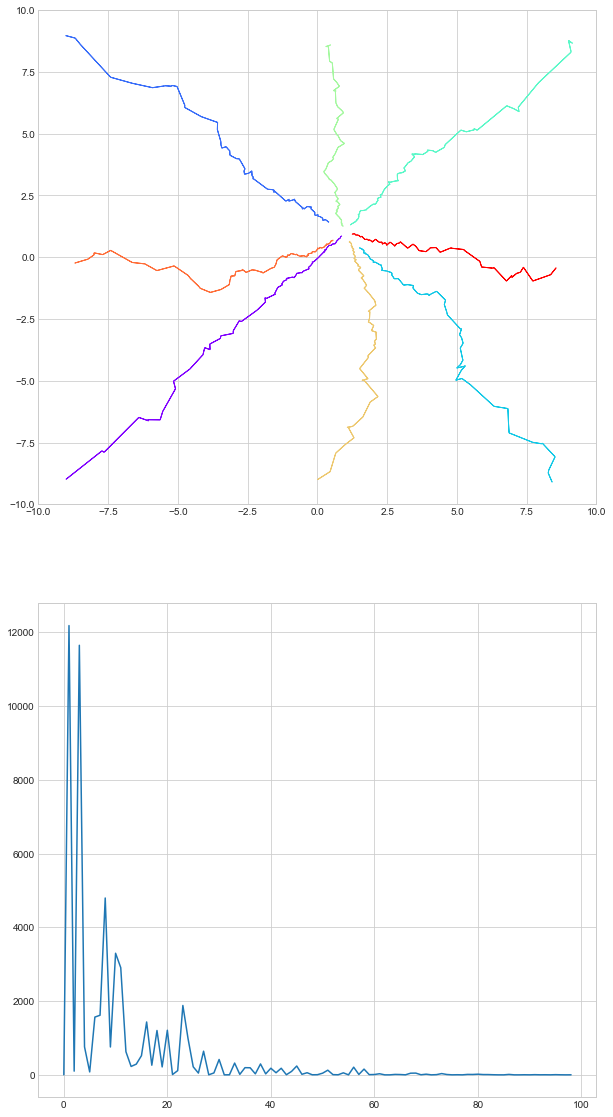

In [3]:
newFig = plt.figure(figsize=(10,20))
axs1 = newFig.add_subplot(2, 1, 1)  # Subplot in der ersten Zeile
axs1.set_xlim([-10, 10])
axs1.set_ylim([-10, 10])

axs2 = newFig.add_subplot(2, 1, 2)  # Subplot in der zweiten Zeile
    
startWeightsForRuns = [ [-9, -9], [-9, 9], [9, -9], [9, 9], [0, 9], [0, -9], [-9, 0], [9, 0] ]

nTrainExamples = 100  # Wie viele Trainingsbeispiele nutzen wir?
learnRate = 0.001  # Lernrate

differentDescentPaths = []
developmentL = []  # Entwicklung des Fehlers, beispielhaft für das erste Experiment hier

for idxRun, ptStartW in enumerate(startWeightsForRuns):  
    wsInCurrentTraining = []
    w = ptStartW
    wsInCurrentTraining.append(w)
    
    for i in range(1, nTrainExamples):
        x = np.random.uniform(-10, 10, size=2)  # Zufällige Eingabe...
        y = x[0] + x[1]                         # ... und zugehöriger Zielwert (Summe)
        yHat = np.inner(x, w)                   # Ausgabe unseres Netzes

        L = 0.5 * (yHat - y)**2                 # loss L (Wert wird für weitere Rechnung nicht benötigt)
        if (0 == idxRun):
            developmentL.append( L )
        
        partD = (yHat - y) * x  #  Partielle Ableitungen nach w1 und und w2:  partD[0] = (yHat - y) * x[0]  und  partD[1] = (yHat - y) * x[1]

        w = w - learnRate * partD  # Änderung von w:  w[0] = w[0] - learnRate * partD[0]  und  w[1] = w[1] - learnRate * partD[1]
        wsInCurrentTraining.append(w)

    differentDescentPaths.append(wsInCurrentTraining)
    
plotPaths(axs1, differentDescentPaths)

plotL(axs2, developmentL)